In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid') #Sets the background style of Seaborn plots to white grid, making plots easier to read.

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')   #Sets Matplotlib’s plot style to 'fivethirtyeight', which mimics the style used by the website FiveThirtyEight.

from keras.models import Sequential #Imports the Sequential model class from Keras, used to build neural networks layer-by-layer.
from keras.callbacks import EarlyStopping  #Imports EarlyStopping, a Keras utility to stop training when the model stops improving, preventing overfitting.
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

#Dense: Fully connected layer.
#LSTM: Long Short-Term Memory layer, for sequence data like time series.
#Dropout: Regularization layer to randomly disable neurons during training to reduce overfitting.\


#Imports MinMaxScaler from scikit-learn, which scales features to a fixed range (usually 0 to 1), useful for normalizing data before training.

In [2]:
data_dir = 'BTC_USD.csv'
df = pd.read_csv(data_dir)

In [3]:
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [4]:
df.tail()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
2782,BTC,2021-05-14,49764.132082,49596.778891,51448.798576,46294.720180
2783,BTC,2021-05-15,50032.693137,49717.354353,51578.312545,48944.346536
2784,BTC,2021-05-16,47885.625255,49926.035067,50690.802950,47005.102292
2785,BTC,2021-05-17,45604.615754,46805.537852,49670.414174,43868.638969
2786,BTC,2021-05-18,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Date                 2787 non-null   object 
 2   Closing Price (USD)  2787 non-null   float64
 3   24h Open (USD)       2787 non-null   float64
 4   24h High (USD)       2787 non-null   float64
 5   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(2)
memory usage: 130.8+ KB


In [6]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace =True)

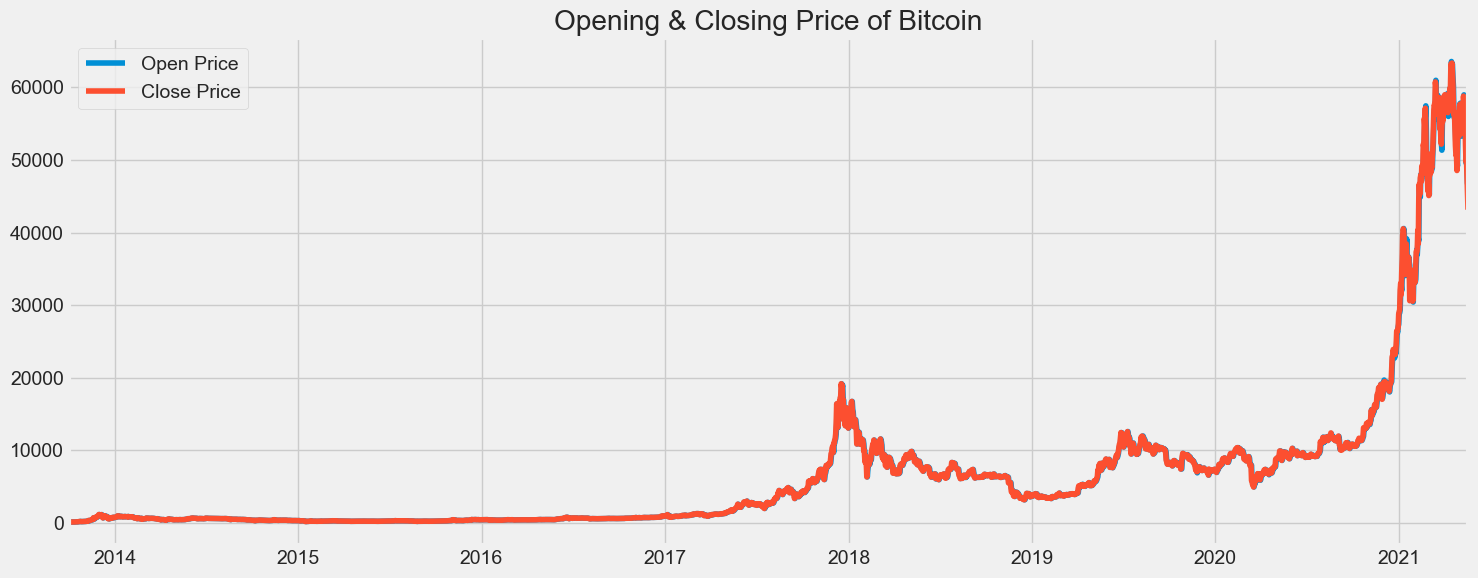

In [8]:
plt.figure(figsize=(15 , 6))
df[r'24h Open (USD)'].plot()
df[r'Closing Price (USD)'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening & Closing Price of Bitcoin')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

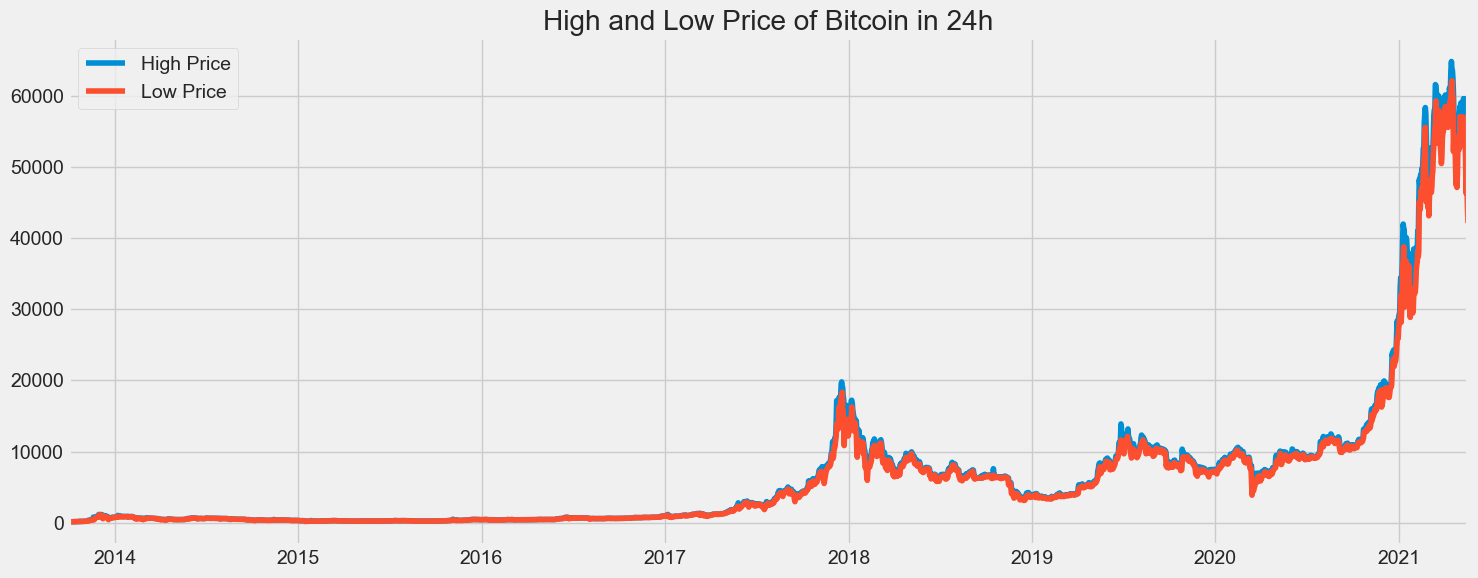

In [9]:
plt.figure(figsize=(15 , 6))
df[r'24h High (USD)'].plot()
df[r'24h Low (USD)'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High and Low Price of Bitcoin in 24h')
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

In [10]:
n_cols = 1
dataset = df[r'Closing Price (USD)' ] 
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(2787, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(np.array(data))

In [12]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print('Train Size:', train_size, 'Test Size:', test_size)


Train Size: 2090 Test Size: 697


In [13]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2090, 1)

In [17]:
x_train =[]
y_train = []
time_steps = 60
n_cols =1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, : n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<= time_steps:
        print('X_train:', x_train)
        print('y_train', y_train)

X_train: [array([[0.00023831],
       [0.00026677],
       [0.        ],
       [0.00015955],
       [0.00020168],
       [0.00019087],
       [0.0002089 ],
       [0.00022847],
       [0.00024454],
       [0.00027478],
       [0.000264  ],
       [0.00027424],
       [0.00028145],
       [0.00042154],
       [0.0003893 ],
       [0.00054047],
       [0.00046394],
       [0.00054345],
       [0.00069526],
       [0.0008184 ],
       [0.00088127],
       [0.00109188],
       [0.00126051],
       [0.00145666],
       [0.00113492],
       [0.00105074],
       [0.00109288],
       [0.00124252],
       [0.00133103],
       [0.00140445],
       [0.00138271],
       [0.00141471],
       [0.00142869],
       [0.00145416],
       [0.00160856],
       [0.00184122],
       [0.00220861],
       [0.00243115],
       [0.00293971],
       [0.00351873],
       [0.00280373],
       [0.00310564],
       [0.00362996],
       [0.00393584],
       [0.00465493],
       [0.00475217],
       [0.0049279 ],
   

In [18]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [19]:
x_train.shape, y_train.shape

((2030, 60, 1), (2030, 1))

In [23]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(n_cols)
])

model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])


In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,953 (163.88 KB)

 Trainable params: 41,953 (163.88 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(x_train ,  y_train,   epochs = 100 , batch_size = 32)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 7.6881e-04 - mean_absolute_error: 0.0166
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 6.4736e-05 - mean_absolute_error: 0.0048
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.0528e-04 - mean_absolute_error: 0.0061
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.5607e-05 - mean_absolute_error: 0.0040
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.9772e-05 - mean_absolute_error: 0.0037
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.4954e-05 - mean_absolute_error: 0.0049
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 6.1941e-05 - mean_absolute_error: 0.0049
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.3379e-05 - mean_absolute_error: 0.0038
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.3033e-05 - mean_absolute_error: 0.0039
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 3.7714e-05 - mean_absolute_err

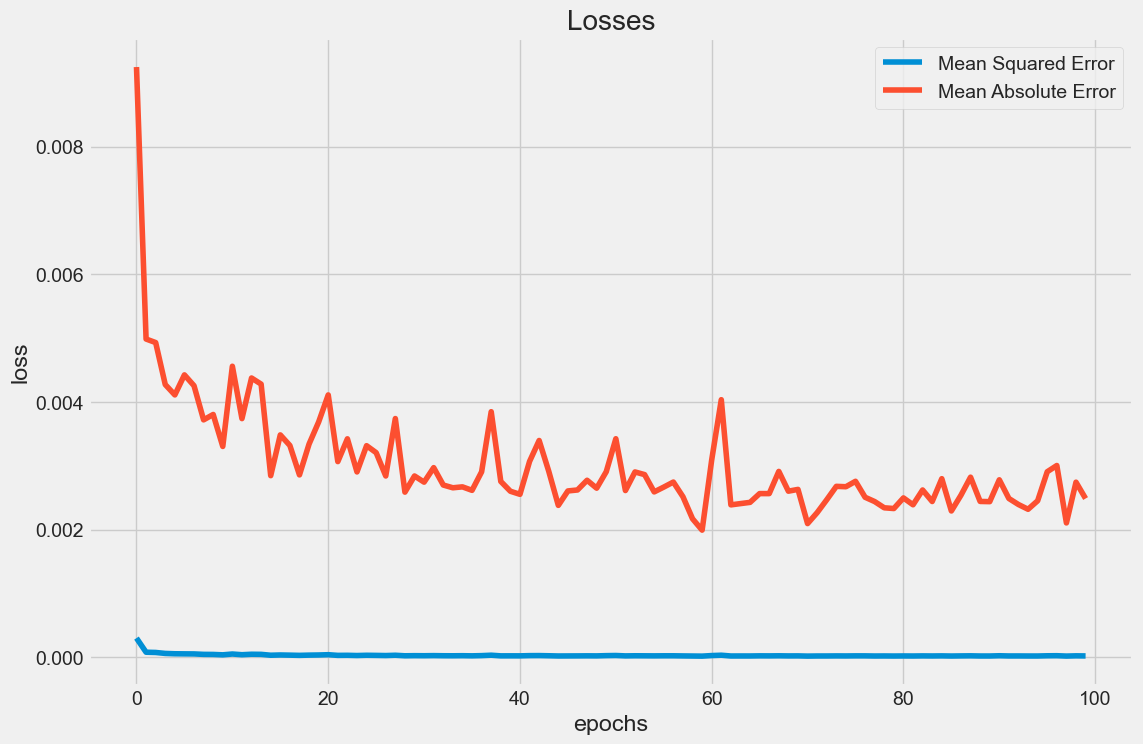

In [27]:
plt.figure(figsize =(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(["Mean Squared Error", "Mean Absolute Error" ])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [28]:
time_steps = 60

# Get test data (last part of the scaled data)
test_data = scaled_data[train_size - time_steps:, :]

# Empty lists to store test inputs and labels
x_test = []
y_test = []
n_cols = 1

# Create sequences for test data
for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i - time_steps:i, 0:n_cols])  # 60 previous values
    y_test.append(test_data[i, 0:n_cols])  # next value to predict

# Convert to NumPy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape x_test for LSTM: (samples, time_steps, features)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))


In [29]:
x_test.shape, y_test.shape

((697, 60, 1), (697, 1))

In [30]:
predictions = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [31]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(697, 1)

In [35]:
y_test =scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(y_test - predictions)**2).round(2)
rmse

np.float64(1030.48)

x_test.shape, y_test.shape
→ Check shape of test data.

predictions = model.predict(x_test)
→ Predict future values using the trained model.

predictions = scaler.inverse_transform(predictions)
→ Convert predictions back to original scale (from normalized values).

y_test = scaler.inverse_transform(y_test)
→ Convert true values back to original scale too.

rmse = np.sqrt(np.mean((y_test - predictions)**2)).round(2)
→ This calculates RMSE, which tells you:

❝On average, how far off is your model's prediction from the actual value❞
→ Lower RMSE = better model performance.

Root Mean Squared Error



In [36]:
preds_acts = pd.DataFrame(data = {'Predictions' : predictions.flatten(), 'Actuals': y_test.flatten()})


In [37]:
preds_acts

,Predictions,Actuals
0,9318.196289,9906.407965
1,9650.144531,10461.412169
2,10170.920898,10843.570975
3,10553.928711,10996.459750
4,10717.432617,11665.409684
...,...,...
692,47173.921875,49764.132082
693,45272.191406,50032.693137
694,45904.753906,47885.625255
695,43858.613281,45604.615754


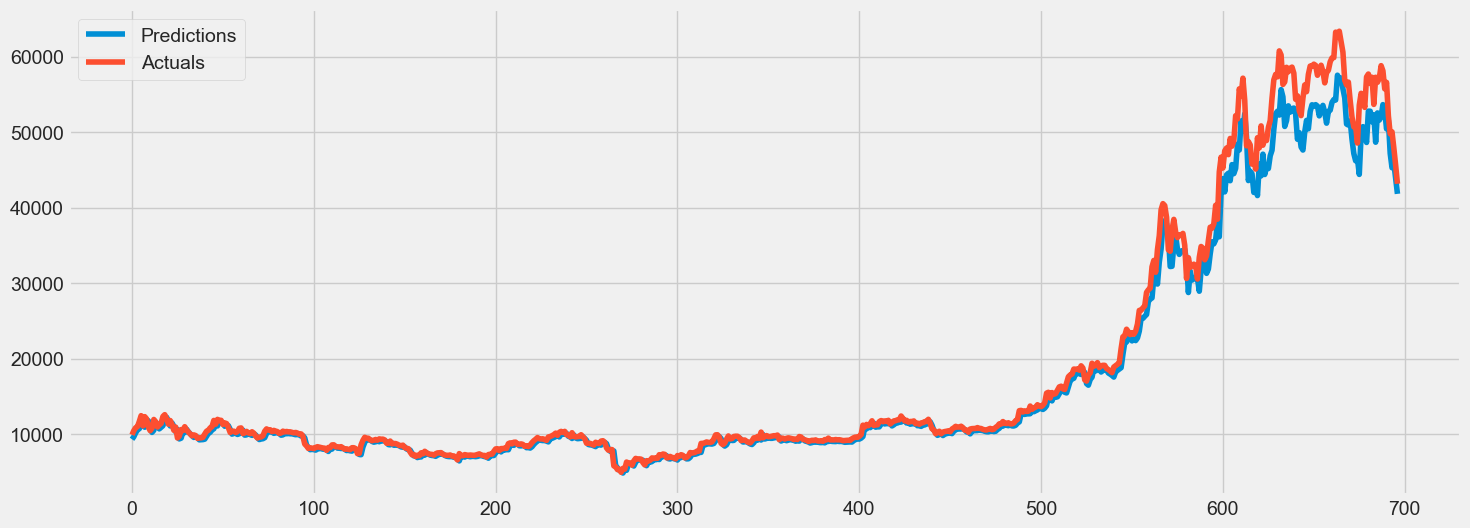

In [40]:
plt.figure(figsize=(16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])  
plt.legend(['Predictions', 'Actuals'])
plt.show()


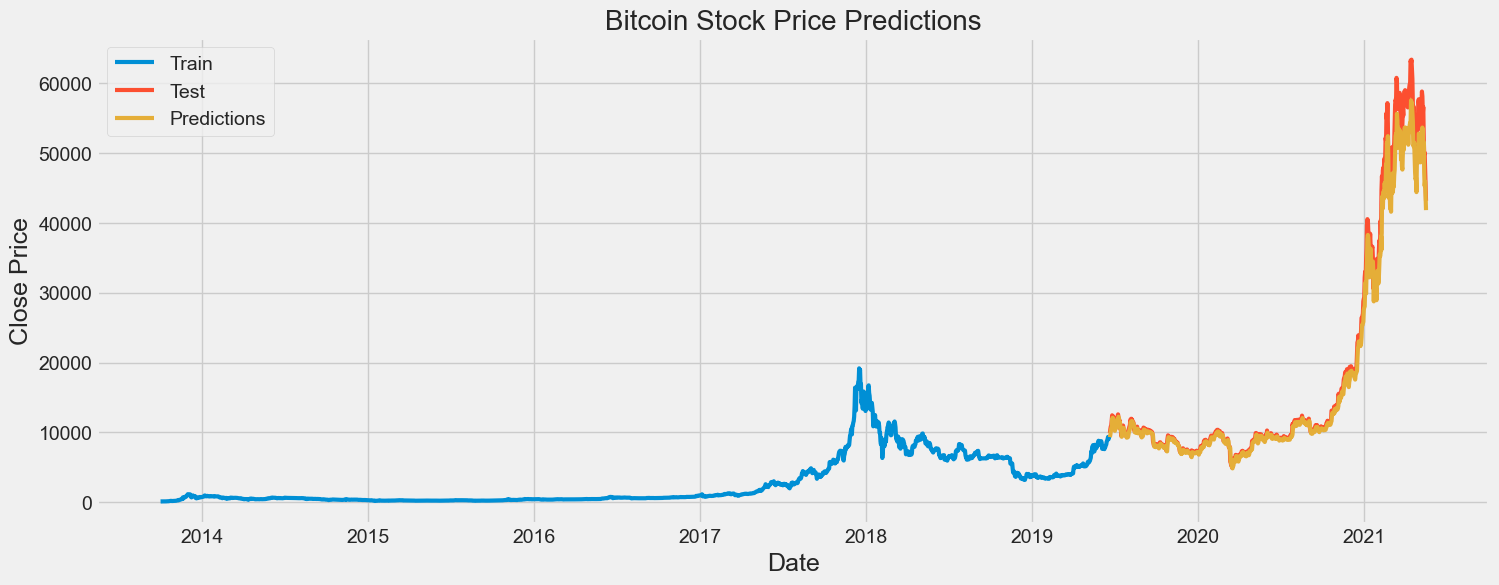

In [43]:
# Assign predictions to the test DataFrame
# Fix: Use proper column indexing - iloc[rows, columns]
train = dataset.iloc[:train_size, :]  # All columns for training data
test = dataset.iloc[train_size:, :]   # All columns for test data
test = test.copy()  # Create a copy to avoid SettingWithCopyWarning
test['Predictions'] = predictions

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Bitcoin Stock Price Predictions', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

# Plot actual training and test data
plt.plot(train['Closing Price (USD)'], linewidth=3)
plt.plot(test['Closing Price (USD)'], linewidth=3)

# Plot predictions
plt.plot(test['Predictions'], linewidth=3)

# Legend
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()